In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data from excel
data = pd.read_excel('dset_test01.xlsx',header=None)
#Converting dataframe to numpy array
data = np.array(data)

In [3]:
d = data[:,0:-1] #Features
l = data[:,-1]   #Label

#Creating training,validation and testing data
train_x, tdset_x, train_y, tdset_y = train_test_split(d,l,test_size=0.2)

valid_x, test_x, valid_y, test_y = train_test_split(tdset_x,tdset_y,test_size=0.5)

print(d.shape)
print(l.shape)
print(train_x.shape)
print(train_y.shape)
print(tdset_x.shape)
print(tdset_y.shape)
print(valid_x.shape)
print(valid_y.shape)
print(test_x.shape)
print(test_y.shape)


(1331, 12)
(1331,)
(1064, 12)
(1064,)
(267, 12)
(267,)
(133, 12)
(133,)
(134, 12)
(134,)


# NN

In [11]:
def nn_activation(x_train,y_train,x_test,y_test):
    error_rate = []
    activation = ['identity','logistic','tanh','relu']
    for i in activation:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,activation=i,learning_rate_init=0.001,
                                             max_iter=30000,shuffle=True)
        model.fit(x_train, y_train)
        print("Activation Function:",i)
        y_pred = model.predict(x_train)
        count=0
        for j in range(len(y_train)):
            if y_train[j] == y_pred[j]:
                count = count+1
        print("Accuracy on Training data:",(count/len(y_train)))
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
        print("Accuracy on Validation data:",(count/len(y_test)))
        
        
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at %s." % (error_rate[kloc], activation[kloc]))
    return activation[kloc]

In [4]:
def nn_hidden_layer(x_train,y_train,x_test,y_test):
    error_rate = []
    train_acc = []
    hidden_layer=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=i,activation='relu',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
        train_acc.append(model.score(x_train,y_train))
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at hidden layer size=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, train_acc, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=5)
    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
    plt.title('Accuracy vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy','Validation Accuracy'])
    plt.show()
    return hidden_layer[kloc]

In [20]:
def nn_hidden_layer_2(x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=[30,35,40,45,50,55,60]
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(85,i),activation='relu',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at hidden layer size=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
    plt.title('Accuracy vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Accuracy')
    plt.show()
    return hidden_layer[kloc]

In [12]:
hidden_layer = nn_activation(train_x,train_y,valid_x,valid_y)

Activation Function: identity
Accuracy on Training data: 0.6860902255639098
Accuracy on Validation data: 0.706766917293233
Activation Function: logistic
Accuracy on Training data: 0.6804511278195489
Accuracy on Validation data: 0.6917293233082706
Activation Function: tanh
Accuracy on Training data: 0.6898496240601504
Accuracy on Validation data: 0.6917293233082706
Activation Function: relu
Accuracy on Training data: 0.7349624060150376
Accuracy on Validation data: 0.7368421052631579
Max accuracy is 0.7368421052631579 occurs at relu.


Max accuracy is 0.7744360902255639 occurs at hidden layer size=50.


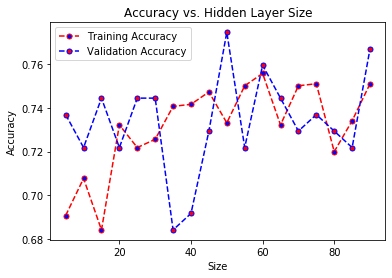

In [6]:
hidden_layer = nn_hidden_layer(train_x,train_y,valid_x,valid_y)

Max accuracy is 0.7443609022556391 occurs at hidden layer size=45.


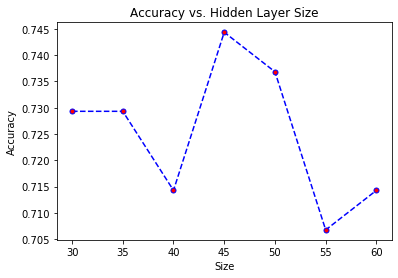

In [21]:
hidden_layer = nn_hidden_layer_2(train_x,train_y,valid_x,valid_y)

# Random Forest

[ 96.80451128  97.93233083  98.40225564  98.12030075  98.59022556
  98.40225564  99.53007519  99.62406015  99.53007519  99.81203008
  99.53007519  99.53007519  99.71804511  99.81203008  99.90601504
  99.81203008 100.         100.          99.81203008  99.90601504
  99.81203008  99.81203008 100.          99.90601504  99.90601504
  99.90601504 100.          99.90601504 100.         100.
  99.90601504 100.         100.          99.90601504  99.90601504
 100.         100.          99.90601504 100.         100.
 100.         100.         100.         100.         100.
 100.        ]
[74.43609023 75.18796992 67.66917293 72.18045113 75.93984962 75.93984962
 72.18045113 71.42857143 77.44360902 68.42105263 69.92481203 78.19548872
 73.68421053 72.18045113 74.43609023 72.93233083 71.42857143 76.69172932
 80.45112782 73.68421053 73.68421053 72.93233083 73.68421053 75.18796992
 72.93233083 73.68421053 72.93233083 74.43609023 72.18045113 73.68421053
 74.43609023 78.19548872 72.93233083 78.19548872 7

Text(0, 0.5, 'Accuracy [%]')

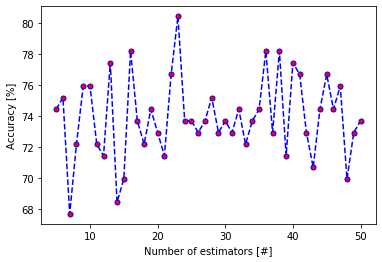

In [32]:
acc_train=[]
acc_test=[]
i=5
while i<=50:
    clf = RandomForestClassifier(n_estimators=i)
    clf = clf.fit(train_x,train_y)
    acc_train.append(clf.score(train_x,train_y)*100)
    acc_test.append(clf.score(valid_x,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(5,51),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Number of estimators [#]')
plt.ylabel('Accuracy [%]')

# K Nearest Neighbors

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100.]
[68.42105263 69.17293233 70.67669173 69.92481203 69.92481203 69.92481203
 71.42857143 72.18045113 69.92481203 70.67669173 69.17293233 71.42857143
 70.67669173 70.67669173 71.42857143 70.67669173 70.67669173 71.42857143
 72.93233083 69.17293233 71.42857143 72.18045113 72.93233083 72.18045113
 71.42857143 70.67669173 71.42857143 71.42857143 70.67669173 69.17293233
 70.67669173 69.92481203 72.18045113 72.93233083 73.68421053 73.68421053
 73.68421053 73.68421053 73.68421053 73.68421053 73.68421053 73.68421053
 73.68421053 73.68421053 73.68421053 74.43609023 73.68421053 72.18045113]


Text(0, 0.5, 'Accuracy [%]')

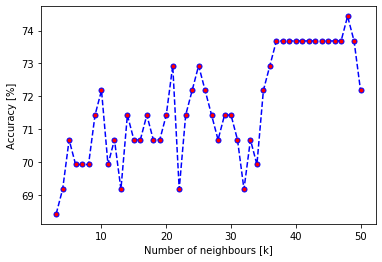

In [29]:
acc_train=[]
acc_test=[]
i=3
while i<=50:
    clf = KNeighborsClassifier(n_neighbors=i,weights='distance')
    clf = clf.fit(train_x,train_y)
    acc_train.append(clf.score(train_x,train_y)*100)
    acc_test.append(clf.score(valid_x,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(3,51),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Number of neighbours [k]')
plt.ylabel('Accuracy [%]')

# Final Models

In [39]:
def classify(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    t_0 = 0
    t_1 = 0
    f_0 = 0
    f_1 = 0
    y_pred = model.predict(x_test)
    for i in range(len(y_test)):
        if y_test[i] == 0:
            if y_test[i]==y_pred[i]:
                t_0 = t_0+1
            else:
                f_1 = f_1+1
        elif y_test[i] == 1:
            if y_test[i] == y_pred[i]:
                t_1 = t_1+1
            else:
                f_0 = f_0+1
                
    print("Confusion Matrix:")            
    print("Predicted\Actual   Not Ghost    Ghost")
    print("Not Ghost          ",t_0,"        ",f_0)
    print("Ghost              ",f_1,"        ",t_1)
    print("Accuracy:",((t_0+t_1)/len(y_test)))
    print("Error Rate:",((f_0+f_1)/len(y_test)),"\n")
    print("Prediction of Not Ghost (clear) Fingerprints")
    print("-------------------")
    print("Precision:",(t_0/(t_0+f_0)))
    print("Recall:",(t_0/(t_0+f_1)),"\n")
    print("Prediction of Ghost Fingerprints")
    print("---------------------")
    print("Precision:",(t_1/(t_1+f_1)))
    print("Recall:",(t_1/(t_1+f_0)))

In [58]:
model_nn = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=85,activation='relu',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)

model_rf = RandomForestClassifier(n_estimators=25)

model_knn = KNeighborsClassifier(n_neighbors=9,weights='distance') 


In [40]:
classify(model_nn,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           50          8
Ghost               25          51
Accuracy: 0.753731343283582
Error Rate: 0.2462686567164179 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.8620689655172413
Recall: 0.6666666666666666 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.6710526315789473
Recall: 0.864406779661017


In [52]:
classify(model_rf,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           56          12
Ghost               19          47
Accuracy: 0.7686567164179104
Error Rate: 0.23134328358208955 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.8235294117647058
Recall: 0.7466666666666667 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.7121212121212122
Recall: 0.7966101694915254


In [59]:
classify(model_knn,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           44          7
Ghost               31          52
Accuracy: 0.7164179104477612
Error Rate: 0.2835820895522388 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.8627450980392157
Recall: 0.5866666666666667 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.6265060240963856
Recall: 0.8813559322033898


([<matplotlib.axis.XTick at 0x17c2706f128>,
 <a list of 5 Text xticklabel objects>)

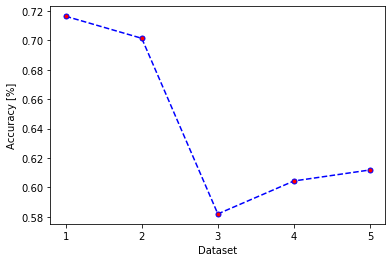

In [21]:
acc = [0.7164,0.7014,0.5820,0.6044,0.6119]

plt.plot(np.arange(1,6),acc, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Dataset')
plt.ylabel('Accuracy [%]')
plt.xticks(np.arange(1, 6, 1.0))